# TP18 : Analyse de données météorologiques

Ce TP est fortement inspiré d'un TP de Guillaume Dewaele que je remercie pour son partage.

Pour ce TP, vous disposez de trois fichiers. Chacun de ces fichiers contient une valeur par ligne, sous forme de flottants, et correspond à des mesures de températures ou de précipitations sur une année non bissextile:

* `temp-jour.dat` contenant les températures maximales en journée (une ligne par date du 1er janvier au 31 décembre, soit 365 lignes),
* `temp-nuit.dat` contenant les températures maximales de nuit (une ligne par date du 1er janvier au 30 décembre, soit 364 lignes; il n'y a pas de température pour la nuit du 31 décembre au 1er janvier),
* `precipitations.dat` contenant les précipitations par jour en mm (365 lignes).

Pour rappel, la lecture dans un fichier permet d'obtenir des chaînes de caractères. On peut convertir une chaîne de caractères qui représente un flottant en valeur de type `float` de la façon suivante:
```python
nombre = float(chaine)
```

### Exercice 1 : récupérer les valeurs des fichiers
Écrire et documenter une fonction `get_values` qui prend en argument un nom de fichier supposé contenir une représentation de flottant sur chaque ligne et qui renvoie une liste contenant ces flottants dans l'ordre.
Créer trois listes `TJ`, `TN` et `P` qui contiendront respectivement dans l'ordre les températures de jour, de nuit et les précipitations, en allant lire les données dans les fichiers correspondants.

In [1]:
###BEGIN SOLUTION
def get_values(fichier):
    L = []
    f = open(fichier)
    for ligne in f.readlines():
        L.append(float(ligne))
    f.close()
    return L
###END SOLUTION

À vous d'ajouter des tests avec les fichiers mis à votre disposition:

In [2]:
# case pour la correction
###BEGIN HIDDEN TESTS
t = get_values('temp-jour.dat')
assert (len(t) == 365)
assert (t[0] == -4.2)
assert (t[364] == 3.0)
assert (t[175] == 33.9)
###END HIDDEN TESTS

On crée maintenant les listes correspondant aux températures diurnes, aux températures nocturnes et aux précipitations:

In [3]:
TJ = get_values('temp-jour.dat')
TN = get_values('temp-nuit.dat')
P = get_values('precipitations.dat')

### Exercice 2 : afficher les courbes de température
Pour afficher les courbes de température, nous allons utiliser des fonctions de du module `matplotlib.pyplot`. Il faut donc importer ce module. Comme le nom est un peu long, on va créer un alias plus court:

In [4]:
import matplotlib.pyplot as plt # si ça ne fonctionne pas, retournez au TP de Noel pour installer ce qu'il faut

Vous pouvez maintenant utiliser `plt` à la place de `matplotlib.pyplot`. Utiliser la fonction `plot` pour dessiner les courbes de températures sur l'année. Cette fonction prend en premier argument une liste de nombres et peut prendre en deuxième argument un format d'affichage sous la forme d'une chaîne de caractères de longueur 2:
* le premier pour la couleur (`b` pour **b**lue, `r` pour **r**ed, `k` pour blac**k**, `g` pour **g**reen, etc.),
* le deuxième pour le type d'affichage(`o` pour des gros points, `.` pour des petits points,`x` pour des croix, `+` pour des plus, `-` pour des lignes, etc.).

Afficher les courbes de températures diurnes (en rouge) et nocture (en bleu).

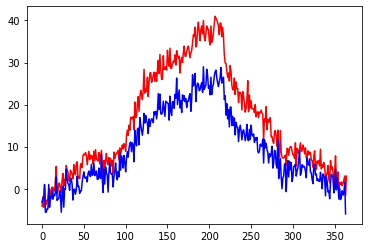

In [5]:
###BEGIN SOLUTION
plt.plot(TJ,"r")
plt.plot(TN, "b-")
###END SOLUTION

### Exercice 3 : obtenir un jour à partir d'un indice
L'année des mesures commence un lundi. Et vos tableaux de mesure contiennent une case par journée. On voudrait pourvoir identifier la date à partir de l'indice. Pour cela, on dispose des données suivantes (on peut accéder à une composante d'un couple avec la même notation que pour les cases d'une liste):

In [6]:
jours = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']
mois = [ {'nom': 'janvier', 'len': 31},
     {'nom': 'février', 'len': 28},
     {'nom': 'mars', 'len': 31},
     {'nom': 'avril', 'len': 30},
     {'nom': 'mai', 'len': 31},
     {'nom': 'juin', 'len': 30},
     {'nom': 'juillet', 'len': 31},
     {'nom': 'août', 'len': 31},
     {'nom': 'septembre', 'len': 30},
     {'nom': 'octobre', 'len': 31},
     {'nom': 'novembre', 'len': 30},
     {'nom': 'décembre', 'len': 31} ]

Écrire et documenter une fonction `date` qui prend en argument un entier supposé compris entre 0 et 364 et renvoie le jour correspondant sous forme de chaîne de caractère (0 donne `"lundi 1 janvier"`).

In [7]:
###BEGIN SOLUTION
def date(n):
    assert(n>=0 and n<=364)
    jj = jours[n % 7]
    n = n+1
    m = 0
    le_mois = mois[m]
    while le_mois['len'] < n:
        n -= le_mois['len']
        m += 1
        le_mois = mois[m]
    return jj + ' ' + str(n) + ' ' + le_mois['nom']
###END SOLUTION

Quelques dates pour vos tests:
* 2 : mercredi 3 janvier
* 180 : samedi 30 juin
* 363 : dimanche 30 décembre

In [8]:
# case pour la correction
###BEGIN HIDDEN TESTS
assert (date(0) == 'lundi 1 janvier')
assert (date(181) == 'dimanche 1 juillet')
###END HIDDEN TESTS

### Exercice 4 : réciproque
Écrire et documenter une fonction `indice` qui prend en argument un nombre et un nom de mois correspondant à une date et renvoie l'indice correspondant dans les listes `TJ`, `TN` et `P`. Par exemple `indice(1, 'janvier')` doit renvoyer 0.
Un algorithme possible est d'ajouter les longueurs des mois jusqu'à tomber sur le mois recherché, puis de sortir de la boucle. Pour sortir d'une boucle lors d'une itération, on utilise le mot-clef `break`:

In [9]:
for i in range(20):
    if i < 5:
        print(i)
    else:
        break
print('toto')

0
1
2
3
4
toto


In [10]:
###BEGIN SOLUTION
def indice(jour, le_mois):
    n = 0
    for m in mois:
        if m['nom'] != le_mois:
            n += m['len']
        else:
            break
    return n + jour - 1
###END SOLUTION

In [11]:
# case pour la correction
###BEGIN HIDDEN TESTS
assert (indice(1, 'janvier') == 0)
assert (indice(30, 'juin') == 180)
assert (indice(1, 'juillet') == 181)
###END HIDDEN TESTS

### Exercice 5 : récupérer de l'information
Pour chacune des questions qui suit, vous devez mettre la réponse dans une variable qui est spécifiée. Il s'agit bien entendu de déterminer la réponse en programmant, pas en regardant les données. Les jours sont à donner sous forme de chaîne de caractères, les températures sous formes de flottants, les décomptes sous forme d'entiers.

1. Déterminer le jour le plus chaud de l'année (variable `J1`) et la température correspondante (`T1`).
2. Déterminer, de même, la nuit la plus froide (`N2`) et la température correspondante (`T2`). 
3. Quelle est la plus chaude journée durant laquelle il a plu (`J3`) ? 
4. Quelle est la plus froide journée sèche (on parle des températures de jour ici) (`J4`) ?
5. Quelle est la moyenne des températures *diurnes* pendant l'été (entre le 21 juin inclus et le 21 septembre exclu) (`T5`)? 
6. Combien de nuits ont eu du gel (température nocturne strictement inférieure à 0) (`N6`)? 
7. Quel est le jour pour lequel l'écart entre la température du jour et de la nuit *qui a suivi* (donc portant le même indice) a été le plus important (`J7`) ?
8. Quels sont les deux jours consécutifs pour lesquels la différence de température diurne est maximale (`J8a` puis `J8b`) ? 

In [12]:
###BEGIN SOLUTION
i = 0
for j in range(1, len(TJ)):
    if TJ[j] > TJ[i]:
        i = j
j1 = date(i)
t1 = TJ[i]

i = 0
for j in range(1, len(TJ)):
    if TJ[j] < TJ[i]:
        i = j
n2 = date(i)
t2 = TJ[i]

i = 0
for j in range(1, len(TJ)):
    if (TJ[j] > TJ[i] and P[j] > 0) or TJ[i] == 0:
        i = j
j3 = date(i)

i = 0
for j in range(1, len(TJ)):
    if (TJ[j] < TJ[i] and P[j] == 0) or TJ[i] > 0:
        i = j
j4 = date(i)

ete = TJ[indice(21, 'juin'):indice(21, 'septembre')]
t5 = sum(ete)/len(ete)

n6 = len([ t for t in TN if t < 0 ])

i = 0
for j in range(1, len(TN)):
    if abs(TN[j]-TJ[j]) > abs(TN[i]-TJ[i]):
        i = j
j7 = date(i)

i = 0
for j in range(1, len(TJ)-1):
    if abs(TJ[j+1]-TJ[j]) > abs(TJ[i+1]-TJ[i]):
        i = j
j8a = date(i)
j8b = date(i+1)

J1 = j1; T1 = t1
N2 = n2; T2 = t2
J3 = j3
J4 = j4
T5 = t5
N6 = n6
J7 = j7
J8a = j8a
J8b = j8b
###END SOLUTION

In [13]:
# case pour la correction
###BEGIN HIDDEN TESTS
assert (j1 == J1); assert (t1 == T1)
assert (n2 == N2); assert (t2 == T2)
assert (j3 == J3)
assert (j4 == J4)
assert (t5 == T5)
assert (n6 == N6)
assert (j7 == J7)
assert (j8a == J8a); assert (j8b == J8b)
###END HIDDEN TESTS

### Exercice 6 : plus difficile

9. Quelle est la plus longue période de jours consécutifs sans pluie (quand commence-t-elle (`J9`) ? combien de jours dure-t-elle (`N9`) ?)
10. Une *canicule* est une succession d'au moins trois jours où la température diurne est supérieure ou égale à 37°C et où elle ne descend pas strictement en-dessous de 25°C la nuit. Déterminer le nombre de canicules éventuelles sur cette période (`N10`).

In [21]:
###BEGIN SOLUTION
def sans_pluie(n):
    d = 0
    for i in range(n, len(P)):
        if P[i] == 0:
            d += 1
        else:
            break
    return d

i = 0
while P[i] > 0:
    i += 1
d = sans_pluie(i)
j = i + d
while j < len(P):
    dj = sans_pluie(j)
    if dj > d:
        i = j
        d = dj
    j += dj+1
j9 = date(i)
n9 = d


def canicule(n):
    d = 0
    for i in range(n, len(TN)):
        if TJ[i] >= 37 and TN[i] >= 25:
            d += 1
        else:
            break
    if d >= 3:
        return (True, d)
    else:
        return (False, d)
n = 0
j = 0
while j < len(TN):
    cj = canicule(j)
    if cj[0]:
        n += 1
    j += cj[1]+1
n10 = n
    
J9 = j9; N9 = n9
N10 = n10
###END SOLUTION

In [24]:
# case pour la correction
###BEGIN HIDDEN TESTS
assert (J9 == j9); assert (N9 == n9)
assert (N10 == n10)
###END HIDDEN TESTS

<div class="alert alert-success">
    <h2>Les points à retenir</h2>
    
* on peut convertir une chaîne de caractère en flottant avec `float(chaine)` (si ça a un sens),
* on peut créer un alias sur un module avec le mot-clef `as`,
* `break` pour sortir d'une boucle.
</div>